## 2641. Cousins in Binary Tree II

Description:

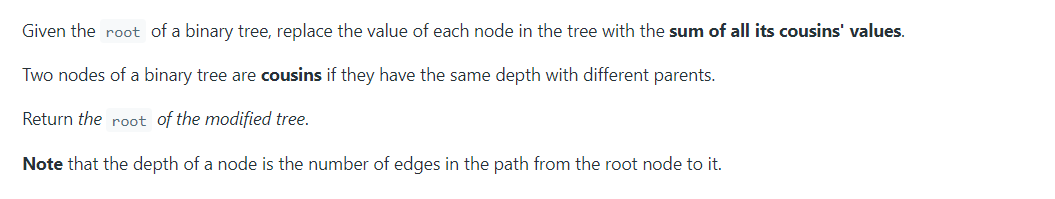

### Examples:

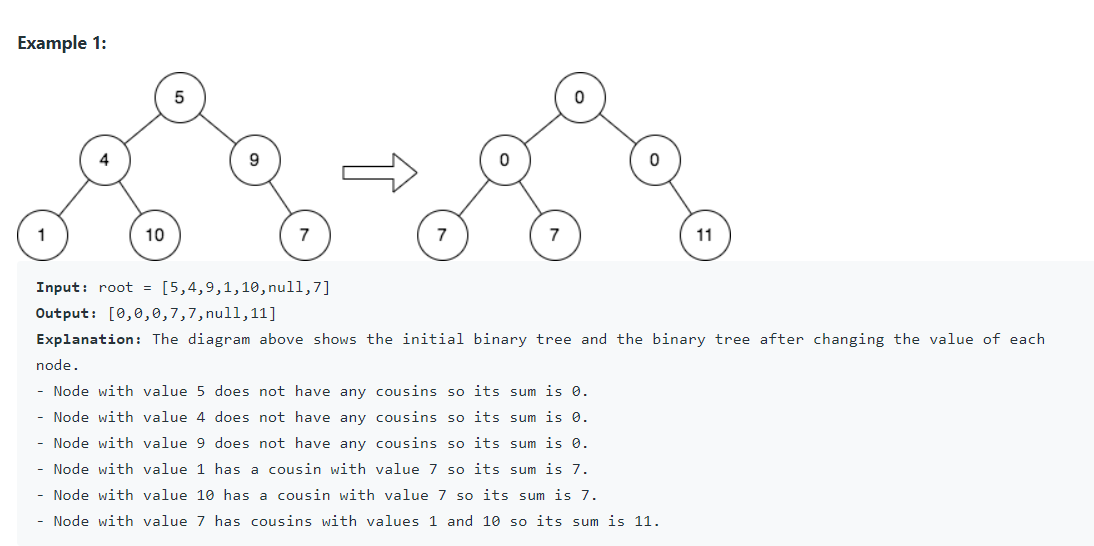

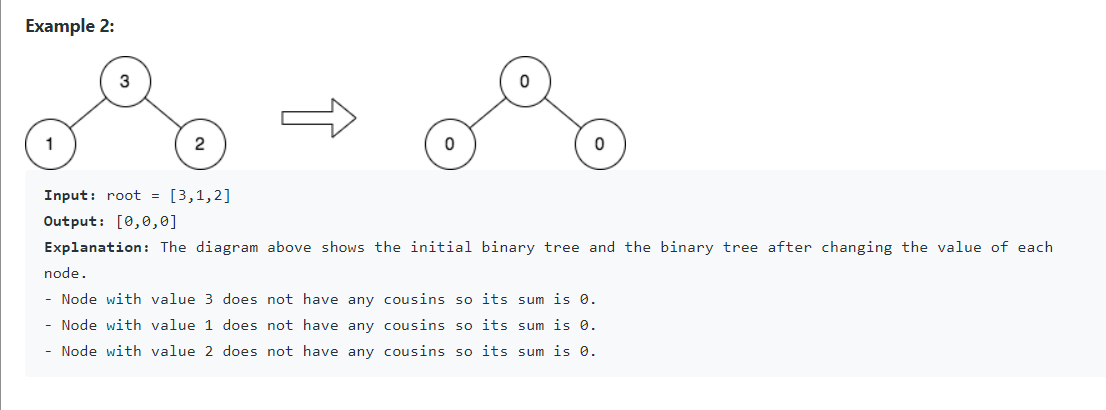

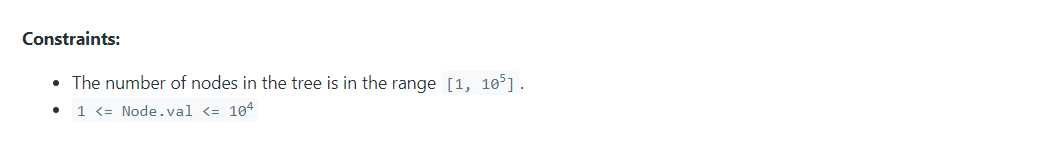

### Explanation:


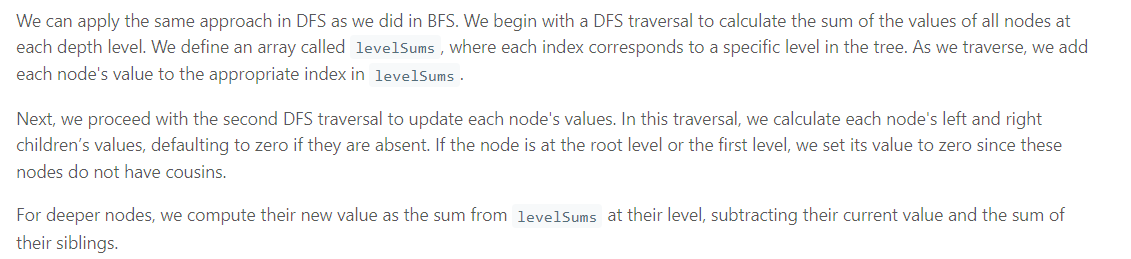

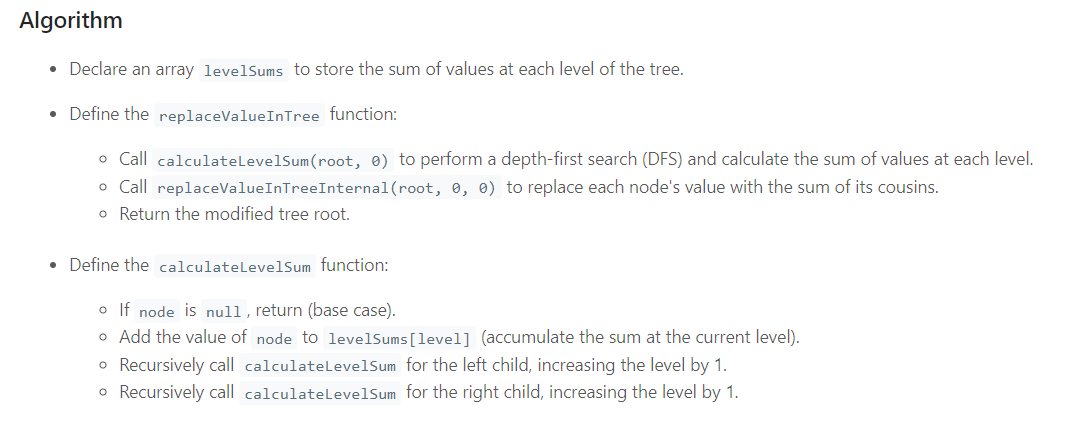

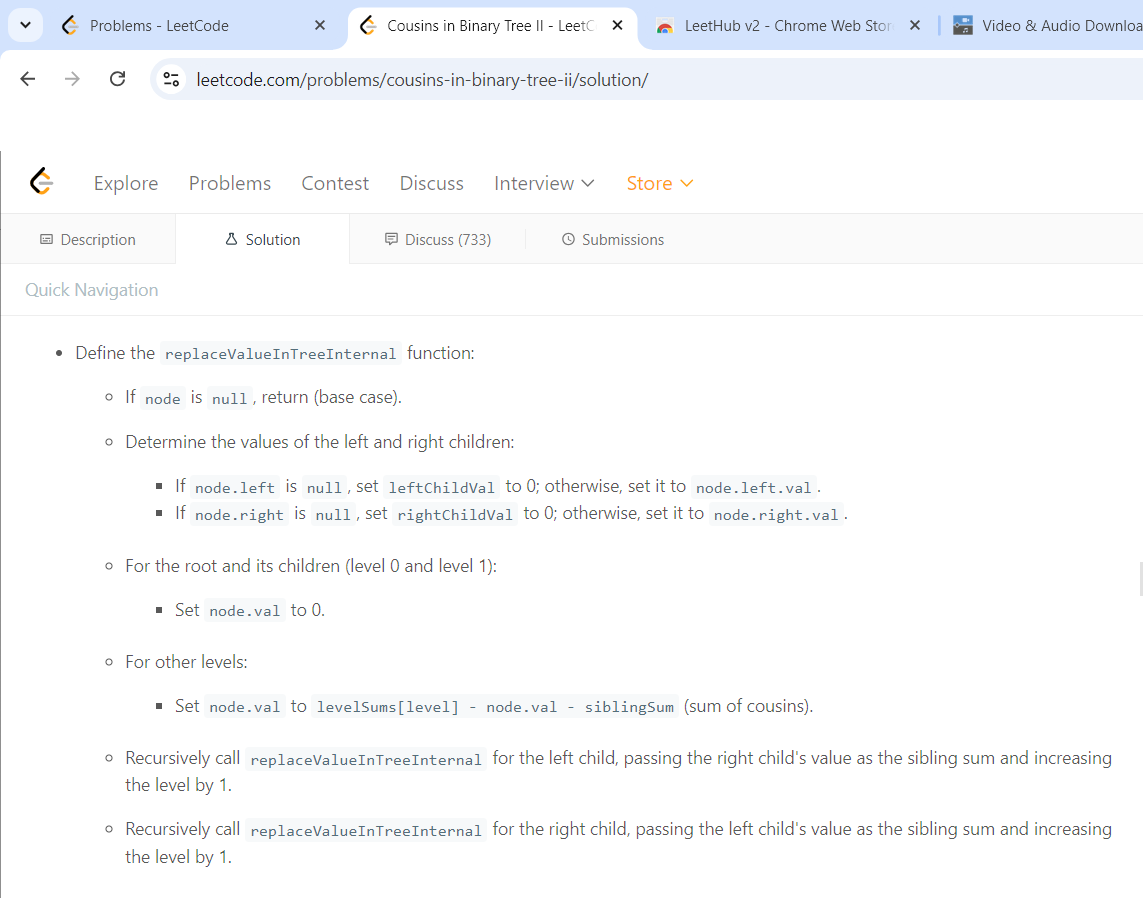

### Code:

In [5]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def replaceValueInTree(self, root: TreeNode) -> TreeNode:
        if not root:
            return root
        node_queue = deque([root])
        level_sums = []

        # First BFS: Calculate sum of nodes at each level
        while node_queue:
            level_sum = 0
            level_size = len(node_queue)
            for _ in range(level_size):
                current_node = node_queue.popleft()
                level_sum += current_node.val
                if current_node.left:
                    node_queue.append(current_node.left)
                if current_node.right:
                    node_queue.append(current_node.right)
            level_sums.append(level_sum)

        # Second BFS: Update each node's value to sum of its cousins
        node_queue.append(root)
        level_index = 1
        root.val = 0  # Root has no cousins
        while node_queue:
            level_size = len(node_queue)
            for _ in range(level_size):
                current_node = node_queue.popleft()

                sibling_sum = (
                    current_node.left.val if current_node.left else 0
                ) + (current_node.right.val if current_node.right else 0)

                if current_node.left:
                    current_node.left.val = (
                        level_sums[level_index] - sibling_sum
                    )
                    node_queue.append(current_node.left)
                if current_node.right:
                    current_node.right.val = (
                        level_sums[level_index] - sibling_sum
                    )
                    node_queue.append(current_node.right)
            level_index += 1

        return root